In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout 
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 



In [2]:
X_train = np.linspace(-1 , 1 , 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

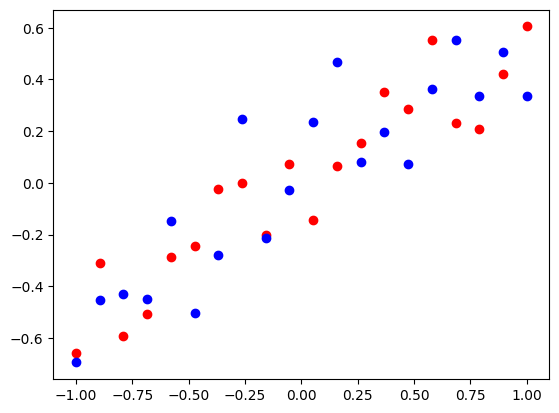

In [6]:
plt.scatter(X_train , y_train , c='red' , label='Train')
plt.scatter(X_test , y_test , c='blue' , label ='Test')

In [7]:
model = Sequential()

model.add(Dense(128 , input_dim = 1 , activation='relu'))
model.add(Dense(128 , activation='relu'))
model.add(Dense(1 , activation='linear'))

adam = Adam(learning_rate=0.01)


/home/aman/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-14 22:38:00.370677: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.compile(loss = 'mse' , optimizer=adam , metrics=['mse'])

In [9]:
hist = model.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step - loss: 0.1225 - mse: 0.1225 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0173 - mse:

In [10]:
_ , train_mse = model.evaluate(X_train , y_train , verbose=0)
_ , test_mse = model.evaluate(X_test , y_test , verbose=0)

print('Train : {} , Test : {}'.format(train_mse , test_mse))

Train : 0.0047112805768847466 , Test : 0.045758698135614395


In [11]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


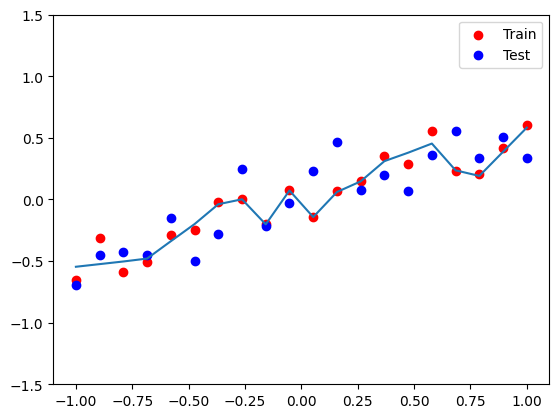

In [12]:
plt.figure()
plt.scatter(X_train , y_train , c='red' , label = 'Train')
plt.scatter(X_test , y_test , c='blue' , label = 'Test')
plt.plot(X_test , y_pred)
plt.legend()
plt.ylim((-1.5 , 1.5))
plt.show()

# Dropout Model

In [20]:
dropout_model = Sequential()
dropout_model.add(Dense(128 , input_dim = 1 , activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(128 , activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(1 , activation='linear'))

adam = Adam(learning_rate=0.01)


/home/aman/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
dropout_model.compile(loss='mse' , optimizer=adam , metrics=['mse'])

In [22]:
dropout_hist = dropout_model.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - loss: 0.1387 - mse: 0.1387 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0516 - val_mse: 0.0516
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0533 - val_mse: 0.0533
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0374 - mse:

In [23]:
_ , train_mse = dropout_model.evaluate(X_train , y_train , verbose=0)
_ , test_mse = dropout_model.evaluate(X_test , y_test , verbose=0)

print('train mse : {} , Test MSE : {}'.format(train_mse , test_mse))

train mse : 0.01625126041471958 , Test MSE : 0.03819603845477104


In [24]:
y_pred_2 = dropout_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


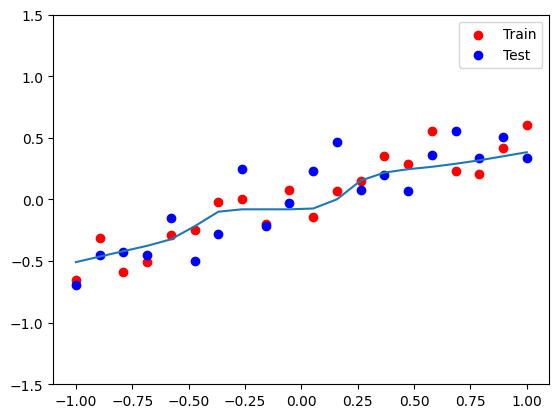

In [25]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

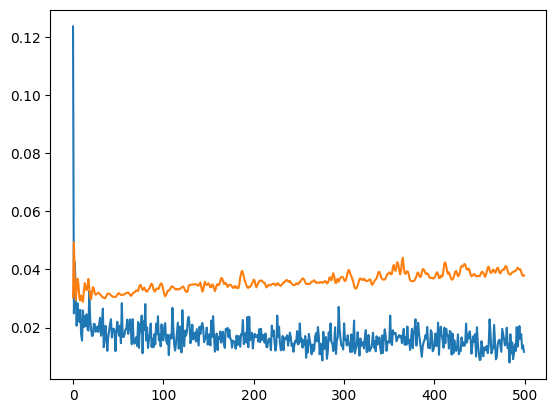

In [19]:
plt.plot(dropout_hist.history['loss'])
plt.plot(dropout_hist.history['val_loss'])
plt.show()

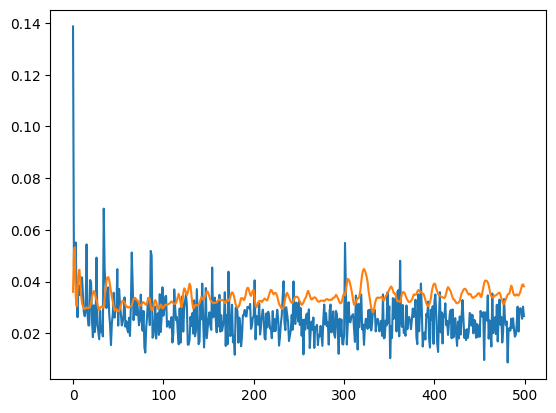

In [26]:
plt.plot(dropout_hist.history['loss'])
plt.plot(dropout_hist.history['val_loss'])
plt.show()